### Supervised Learning Article 
https://builtin.com/data-science/supervised-learning-python

The ultimate goal of SL algorithm is to predict Y with the max accuracy for a given new input X

WHAT IS SUPERVISED LEARNING?

Supervised learning is a machine learning task where an algorithm is trained to find patterns using a dataset. The supervised learning algorithm uses this training to make input-output inferences on future datasets. In the same way a teacher (supervisor) would give a student homework to learn and grow knowledge, supervised learning gives algorithms datasets so it too can learn and make inferences.

EX:
- Y = $f$(X)+ C
- $f$ will be the relation between the marks and number of hours the student prepared for an exam.
- X is the INPUT (Number of hours he prepared).
- Y is the output (Marks the student scored in the exam).
- C will be a random error.

Two types of ML problems:
- Classification: If the given data has both input (training) values and output (target) values, then it is a classification problem. 
    - EX: is iy a cat or a dog?
- Regression: If the dataset has continuous numerical values of attributes without any target labels, then it is a regression problem.
    - EX: How much will the house sell for?


### Classification
- prediction problem that predicts categorical class labels (discrete, unordered data); two steps: learning then classification
- classification techniques:
    - K-nearest neighbor
    - Decision trees
    - Naive Bayes
    - Support vector machines

In the first step, the classification model builds the classifier by analyzing the training set. Next, the class labels for the given data are predicted. The dataset tuples and their associated class labels under analysis are split into a training set and test set. The individual tuples that make up the training set are randomly sampled from the dataset under analysis. The remaining tuples form the test set and are independent of the training tuples, meaning they will not be used to build the classifier.

The test set is used to estimate the predictive accuracy of a classifier. The accuracy of a classifier is the percentage of test tuples that are correctly classified by the classifier. To achieve higher accuracy, the best way is to test out different algorithms and try different parameters within each algorithm. The best one can be selected by cross-validation.

To choose a good algorithm for a problem, parameters such as accuracy, training time, linearity, number of parameters and special cases must be taken into consideration for different algorithms.


In [37]:
#we learn about the attributes of the IRIS dataset 

from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

# Loading IRIS dataset from scikit-learn object into iris variable.
iris = datasets.load_iris()

# Prints the type/type object of iris
print(type(iris))
# <class 'sklearn.datasets.base.Bunch'>

# prints the dictionary keys of iris data
print(iris.keys())

# prints the type/type object of given attributes
print(type(iris.data), type(iris.target))

# prints the no of rows and columns in the dataset
print(iris.data.shape)

# prints the target set of the data
print(iris.target_names)

# Load iris training dataset
X = iris.data

# Load iris target set
Y = iris.target

# Convert datasets' type into dataframe
df = pd.DataFrame(X, columns=iris.feature_names)

# Print the first five tuples of dataframe.
print(df.head())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4)
['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


K-nearest neighbor (k-NN) classifier is a lazy learner. An algorithm is said to be a lazy learner if it simply stores the tuples of the training set and waits until the test tuple is given. Only when it sees the test tuple does it perform generalization to classify the tuple based on its similarity to the stored training tuples.

Based on learning by analogy, k-NN compares a given test tuple with training tuples that are similar to it. The training tuples are described by n attributes. Each tuple represents a point in an n-dimensional space. In this way, all training tuples are stored in n-dimensional pattern space. When given an unknown tuple, a k-NN classifier searches the pattern space for the k training tuples that are closest to the unknown tuple. These k training tuples are the k “nearest neighbors” of the unknown tuple.

“Closeness” is defined regarding a distance metric, such as Euclidean distance. A good value for K is determined experimentally.

In [39]:
#import k-NN classifier from sklearn 
#and apply to our input data which then classifies the flowers.

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Load iris dataset from sklearn
iris = datasets.load_iris()

# Declare an of the KNN classifier class with the value with neighbors.
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model with training data and target values
knn.fit(iris['data'], iris['target'])

# Provide data whose class labels are to be predicted
X = [
    [5.9, 1.0, 5.1, 1.8],
    [3.4, 2.0, 1.1, 4.8],
]

# Prints the data provided
print(X)

# Store predicted class labels of X
prediction = knn.predict(X)

# Prints the predicted class labels of X
print(prediction)

[[5.9, 1.0, 5.1, 1.8], [3.4, 2.0, 1.1, 4.8]]
[1 1]


0 corresponds versicolor
1 corresponds virginica
2 corresponds setosa

Based on the given input, the machine predicted the both flowers are versicolor using k-NN. Output: [1 1]

K-NN INTUITION FOR IRIS DATASET CLASSIFICATION

If we plot the classified data using the k-NN algorithm in the Iris dataset this is how the flowers are categorized based on the features: the x-axis represents the petal width and the y-axis represents the petal length.

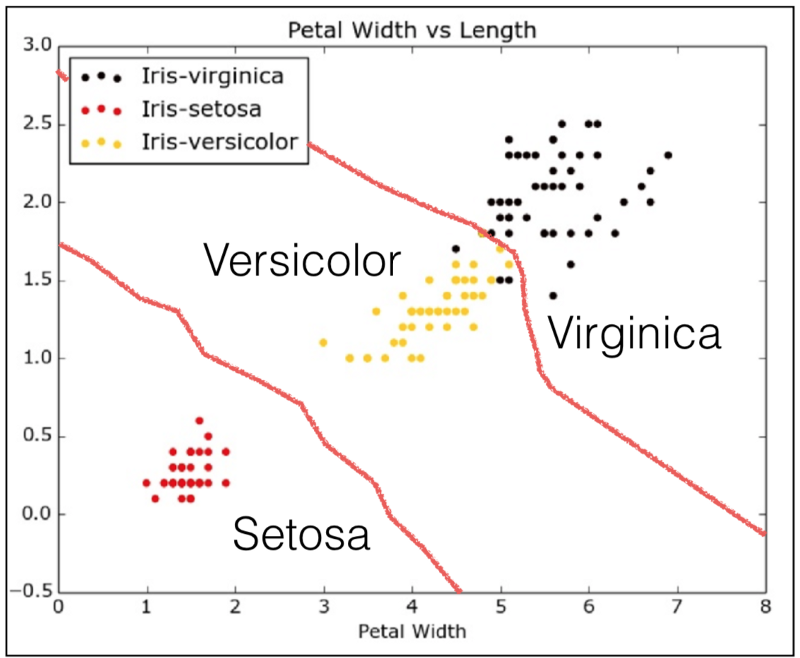

### REGRESSION
Regression is usually defined as determining relationships between two or more variables. For example consider you have to predict the income of a person, based on the given input data X.

Here, the target variable means the unknown variable we care about predicting, and continuous means there aren’t gaps (discontinuities) in the value that Y can take on.

Predicting income is a classic regression problem. Your input data should have all the information (known as features) about the individual that can predict income, such as working hours, education experience, job title and location.

Commonly used regression models:
##### Linear regression
    - establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).
    - h(xi) = βo + β1 * xi + e
        - where βo is the intercept, β1 is the slope of the line and e is error term.
   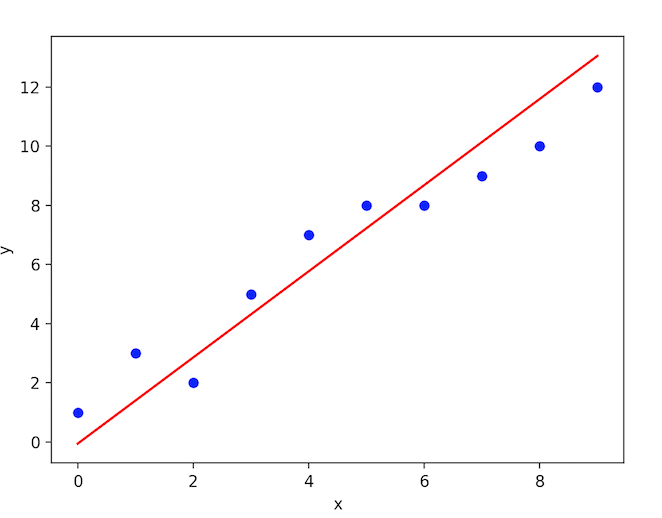

##### Logistic regression
    - is an algorithm used when the response variable is categorical. The idea of logistic regression is to find a relationship between features and probability of a particular outcome.
    - p(X) = βo + β1 * XWherep(x) = p(y = 1 | x)
   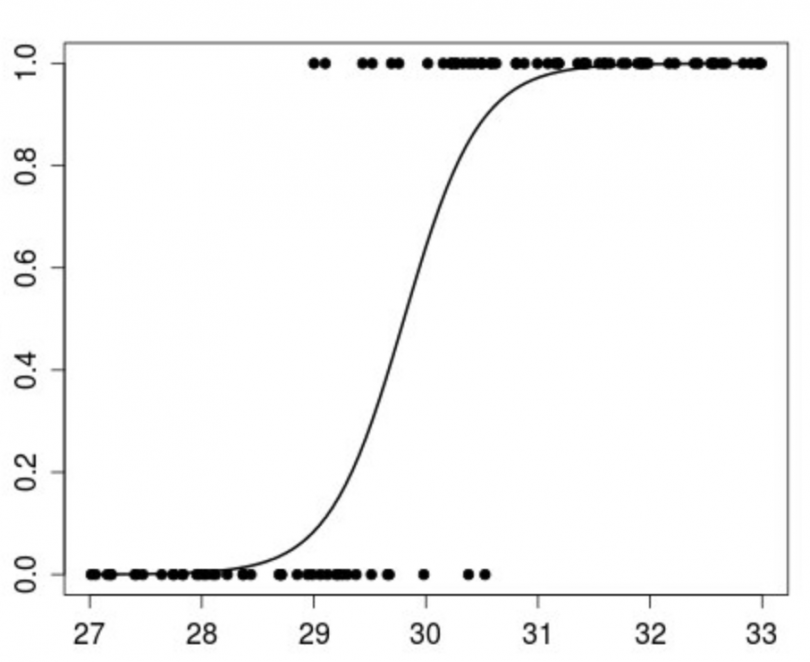
    
##### Polynomial regression
    - form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x.

#### Linear regression problem
With our dataset (X) and corresponding target values (Y), we use ordinary least squares to find a linear model we can use to predict a new y given a previously unseen x with as little error as possible.

The given data is split into a training dataset and a test dataset. The training set has labels (features loaded), so the algorithm can learn from these labeled examples.

The test set does not have any labels, i.e., we don’t yet know the value we're trying to predict.

We’ll consider one feature to be trained, apply a linear regression method to fit the training data and then predict the output using the test dataset.

Input Values
[[ 0.07786339]
 [-0.03961813]
 [ 0.01103904]
 [-0.04069594]
 [-0.03422907]
 [ 0.00564998]
 [ 0.08864151]
 [-0.03315126]
 [-0.05686312]
 [-0.03099563]
 [ 0.05522933]
 [-0.06009656]
 [ 0.00133873]
 [-0.02345095]
 [-0.07410811]
 [ 0.01966154]
 [-0.01590626]
 [-0.01590626]
 [ 0.03906215]
 [-0.0730303 ]]
Predicted Output Values
[225.9732401  115.74763374 163.27610621 114.73638965 120.80385422
 158.21988574 236.08568105 121.81509832  99.56772822 123.83758651
 204.73711411  96.53399594 154.17490936 130.91629517  83.3878227
 171.36605897 137.99500384 137.99500384 189.56845268  84.3990668 ]


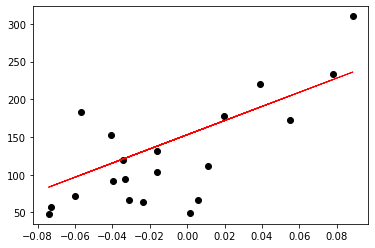

In [41]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature for training
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Input data
print('Input Values')
print(diabetes_X_test)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# Predicted Data
print("Predicted Output Values")
print(diabetes_y_pred)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=1)

#Graph between (diabetes_X_test, diabetes_y_pred) predictions 
#will be continuous on the line equation.
plt.show()

#### Evaluating a regression algorithm 
Let’s say you’ve developed an algorithm which predicts the temperature of the following week. The temperature to be predicted depends on different properties like humidity, atmospheric pressure, air temperature and wind speed. But how accurate are your predictions? To find out, there are two important metrics to consider.

##### Variance 
Variance is the amount by which the estimate of the target function changes if different training data were used. The target function $f$ establishes the relation between the input (properties) and the output variables (predicted temperature) and when a different dataset is used, the target function needs to remain stable without varying because for any given type of data the model should be generic.

In this case, the predicted temperature changes based on the variations in the training dataset. To avoid false predictions, we need to make sure that the variance is low. For that reason, the model should be generalized to accept unseen features of temperature data and produce better predictions as that of training data. 

##### Bias
Bias is the algorithm’s tendency to consistently learn the wrong thing by not taking into account all the information in the data. For the model to be accurate, bias needs to be low. If there are inconsistencies in the dataset like missing values, low number of data tuples or errors in the input data, the bias will be high and the predicted temperature will be wrong. 

##### Accuracy and error
The error is the difference between the actual value and the predicted value estimated by the model, and accuracy is the fraction of predictions our model got right.

##### Overfitting and underfitting
For a model to be ideal, it’s expected to have low variance, low bias and low error. To achieve this, we need to partition the dataset into train and test datasets. The model will then learn patterns from the training dataset and the performance will be evaluated on the test dataset.

To reduce the error while the model is learning, we use an error function. If the model memorizes/mimics the training data fed to it, rather than finding patterns, it will give false predictions on unseen data. The curve derived from the trained model will then pass through all the data points. Nevertheless, the accuracy on the test dataset is low and this is called overfitting, which occurs due to high variance. On the flip side, if the model performs well on the test data but with low accuracy in regard to the training data, this is called underfitting. 